# ANÁLISIS DE DATOS JUGADORES HYPERMOTION





## OBTENCIÓN DE DATOS MEDIANTE WEB SCRAPING


En primer lugar antes de empezar un análisis de datos debemos empezar por lo más básico, la obtención de los datos.
En el caso del mundo del fútbol, tanto los equipos como las web especialistas no comparten datos con el resto de los usuarios, estos datos son demasiado valiosos, por lo que encontrar datos de calidad puede ser una tarea complicada.
Una web que contiene datos fiables es la de la Liga, pero extraerlos datos no es sencillo, ya que, no dispone de una API para poder descargarlos.
Para poder conseguir los datos de esta Web utilizaremos el web scraping.
Para ello accedemos a la página web, localizo la parte del código HTML donde se encuentra la tabla de datos que necesito y mediante un bucle proceso cada una de los índices de la tabla que contiene dicha info y guardo en un diccionario la información de cada jugador. Hay que tener en cuenta que si la estructura de la página web cambia el código deja de funcionar.

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm

Tot = 0
Estadisticas = []
nombre = []
datosEst = []
Datos_Estadisticos = {}

url = 'https://www.laliga.com/estadisticas/laliga-hypermotion/paradas/pagina/'

for i in range(1,41):
  pax = url + str(i)
  paxina = requests.get(pax)
  soup = BeautifulSoup(paxina.content, 'html.parser')
  #print(soup.prettify())
  tabla = soup.find_all('table', class_='styled__TableStyled-sc-57jgok-1 kvoOOd')
  #tabla
  rows = soup.find_all('tr')
  for row in rows:
     row_td = row.find_all('td')
     type(row_td)
     str_cells = str(row_td)
     cleantext = BeautifulSoup(str_cells, "lxml").get_text()
     Estadisticas.append(cleantext)
     Tot = Tot+1

tope = len(Estadisticas)
for fila in range (0,tope):
  if Estadisticas[fila].find('A, Martín') == 1:
    Estadisticas[fila] = Estadisticas[fila].replace('[A, Martín]', '[A. Martín]')

  if Estadisticas[fila] != '[]' and Estadisticas[fila].find(',') == -1 :
        nombre.append(Estadisticas[fila])
  else:
     if Estadisticas[fila] != '[]' and Estadisticas[fila].find(',') != -1 :
          datosEst.append(Estadisticas[fila])




Datos_Estadisticos = dict(zip(nombre, datosEst))


Datos_Estadisticos

{'[P. Campos]': '[CAR, 134, 32, 4.19]',
 '[A. Herrero]': '[MGA, 133, 35, 3.80]',
 '[Yáñez]': '[SPO, 107, 33, 3.24]',
 '[Jokin Ezkieta]': '[RAC, 105, 35, 3.00]',
 '[Gonzalo]': '[CAS, 0, 12, 0]',
 '[Helton Leite]': '[RCD, 99, 33, 3.00]',
 '[D. Jimenez]': '[HUE, 99, 31, 3.19]',
 '[Jesús Ruiz]': '[RFE, 92, 30, 3.07]',
 '[Raúl Lizoain]': '[ALB, 91, 32, 2.84]',
 '[Aarón]': '[OVI, 89, 34, 2.62]',
 '[Andrés Fdez.]': '[LEV, 86, 35, 2.46]',
 '[Cantero]': '[TEN, 0, 21, 0]',
 '[David Gil]': '[CAD, 83, 33, 2.52]',
 '[Raúl Fernández]': '[MIR, 83, 35, 2.37]',
 '[C. Marin]': '[CCF, 78, 33, 2.36]',
 '[Maximiano]': '[ALM, 77, 27, 2.85]',
 '[M. Dituro]': '[ELC, 71, 31, 2.29]',
 '[Magunagoitia]': '[EIB, 65, 25, 2.60]',
 '[Poussin]': '[ZAR, 63, 27, 2.33]',
 '[D.mariño]': '[GRA, 55, 18, 3.06]',
 '[Mackay D.l]': '[ELD, 52, 19, 2.74]',
 '[Dani]': '[ELD, 44, 16, 2.75]',
 '[Salvi C.]': '[TEN, 41, 12, 3.42]',
 '[Luca]': '[GRA, 39, 14, 2.79]',
 '[Edgar Badia]': '[TEN, 38, 19, 2.00]',
 '[Fuzato]': '[EIB, 26, 10, 2

Una vez que tengo los datos en un diccionario ya puedo visualizarlos por medio de un dataframe gracias a pandas

In [ ]:
cols = ['Datos Paradas']
df = pd.DataFrame.from_dict(Datos_Estadisticos, orient='index', columns=cols)
df

,Datos Paradas
[P. Campos],"[CAR, 134, 32, 4.19]"
[A. Herrero],"[MGA, 133, 35, 3.80]"
[Yáñez],"[SPO, 107, 33, 3.24]"
[Jokin Ezkieta],"[RAC, 105, 35, 3.00]"
[Gonzalo],"[CAS, 0, 12, 0]"
...,...
[Endika Mateos],"[EIB, 0, 0, 0]"
[Omar Falah],"[OVI, 0, 0, 0]"
[Dios],"[CAS, 0, 0, 0]"
[Valdera],"[OVI, 0, 0, 0]"


Finalmente guardo el archivo en un .xlsx

In [ ]:
from google.colab import drive;

drive.mount('/content/drive')

df.to_excel("/content/drive/MyDrive/Datos_Hypermotion/Datos_Paradas.xlsx", index=True)

Mounted at /content/drive


## LIMPIEZA DE DATOS

Una vez recopilados todos los datos de la web de la Liga, procedo a unir todos mis archivos, para esto se pueden utilizar dostintas herramientas, Python, Excell, etc...

En este caso voy a utilizar directamente PowerBI, que además de modelar la estructura y realizar la limpieza de datos, permite crear todo tipo de fórmulas con los mismos y visualizarlos de forma clara y sencilla


Una vez finalizada la limpieza el resultado es una tabla con un montón de columnas e información lista para ser usada


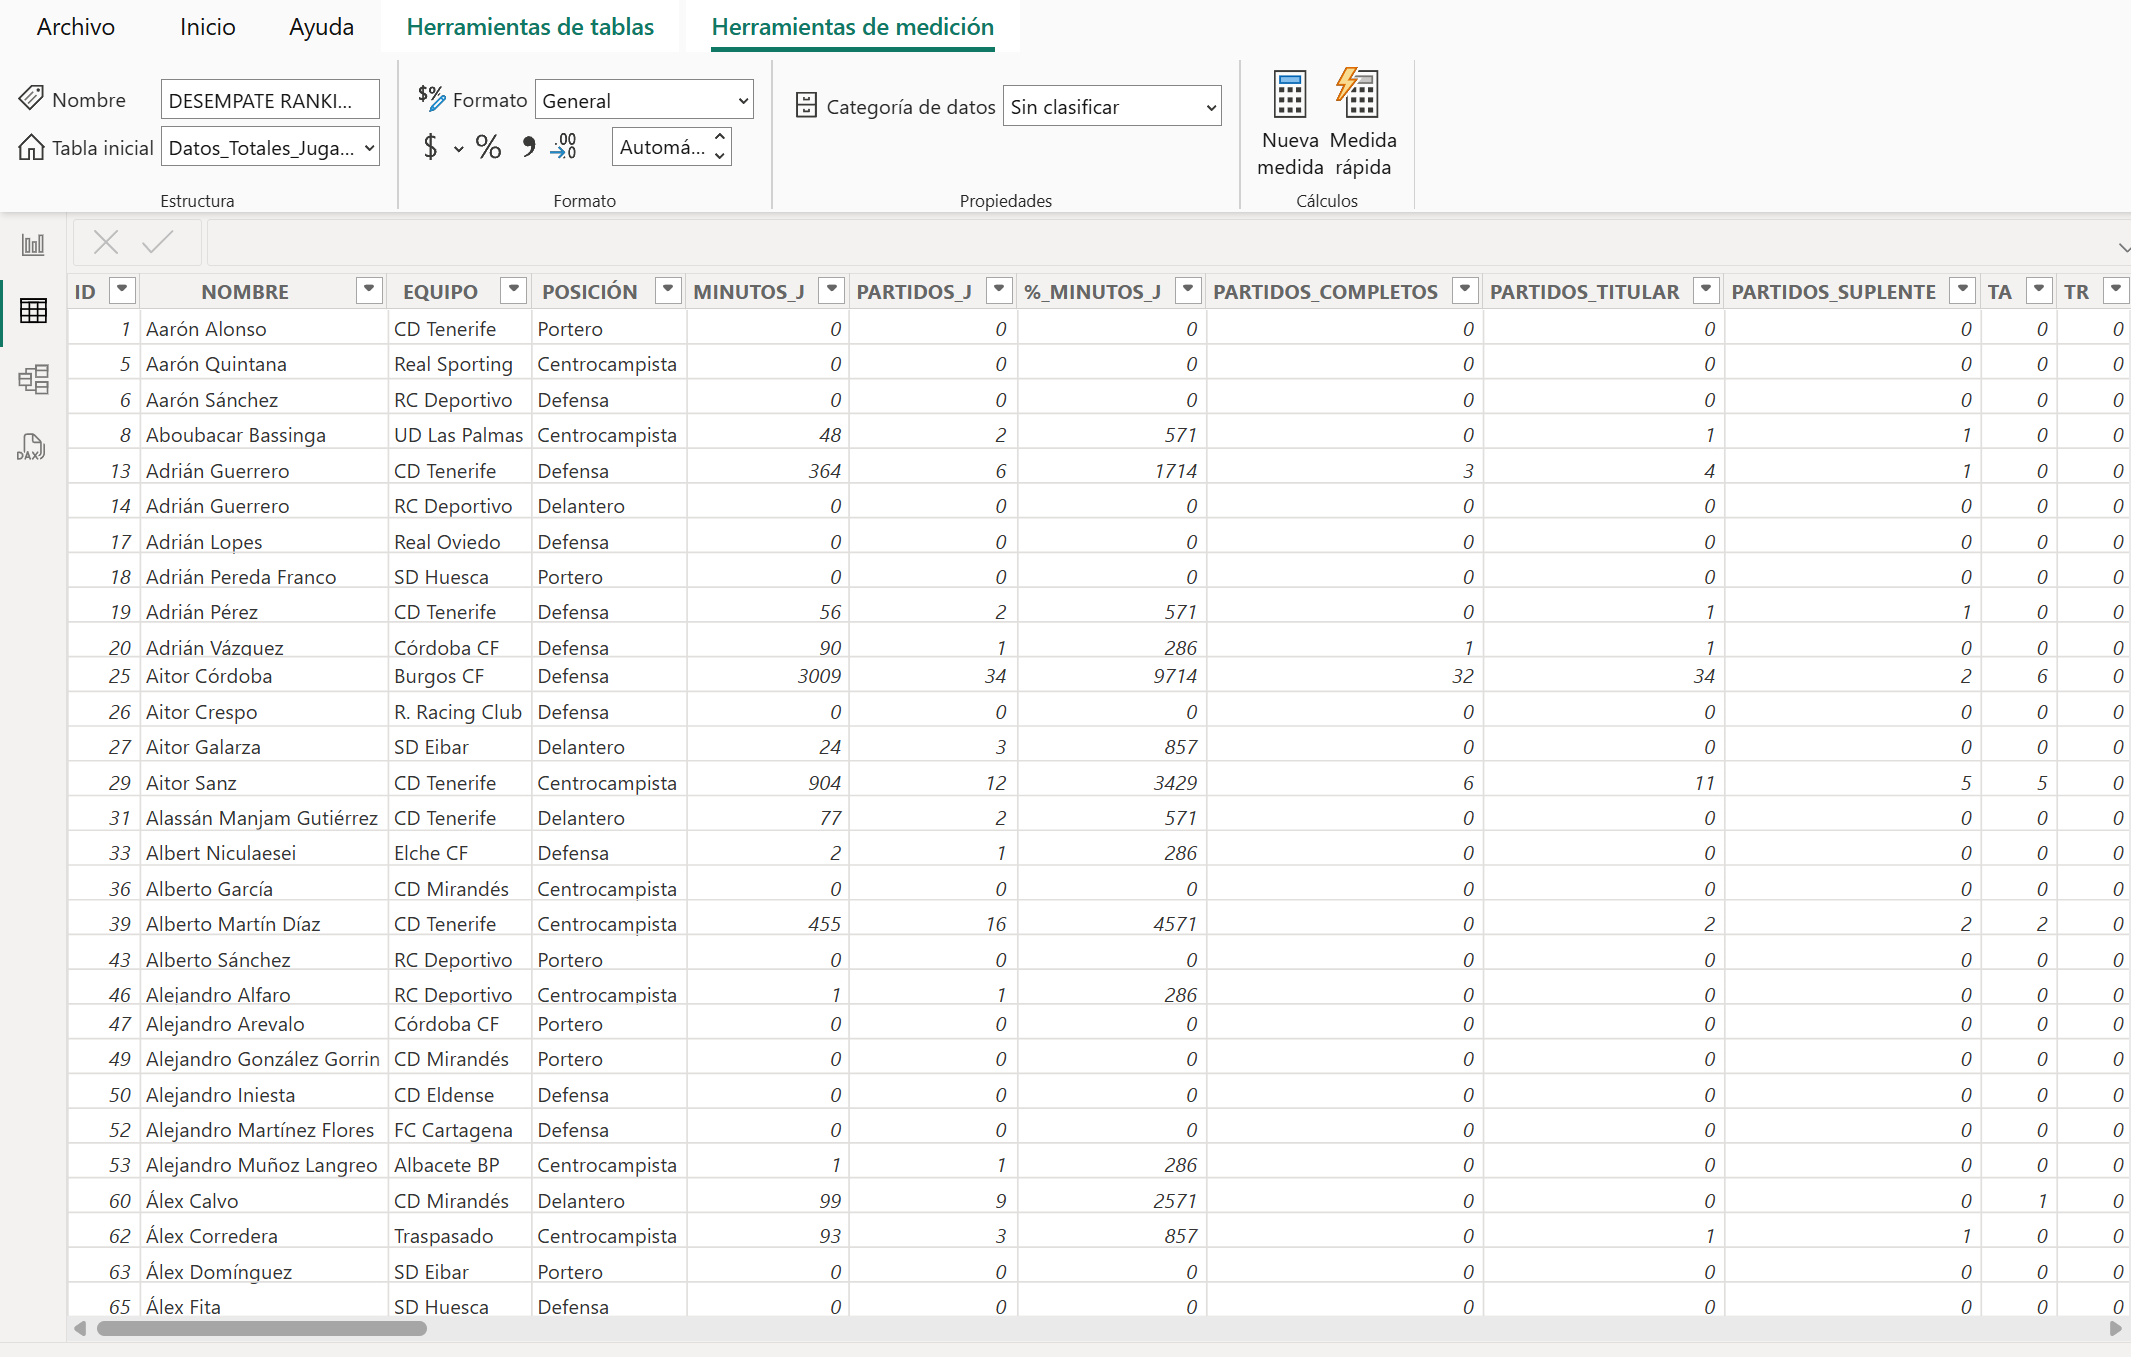

## USAR LOS DATOS DE FORMA ADECUADA


El siguiente paso es contestar a la pregunta, qué buscamos??
Por ejemplo, si queremos un portero lo más fácil es localizar el portero menos goleado, pero...
Es el mejor portero o el que tiene mejor defensa??
Para estar completamente seguros podemos utilizar muchos más parámetros y adecuarlos al tipo de jugador que buscamos.
Para un portero podemos utilizar datos como el número de goles encajados, paradas realizadas, duelos ganados, pases (si queremos un portero que saque el balón jugado), etc...
Con esto darle más peso a aquellas acciones más valiosas para nuestra búsqueda y elaborar un ranking.

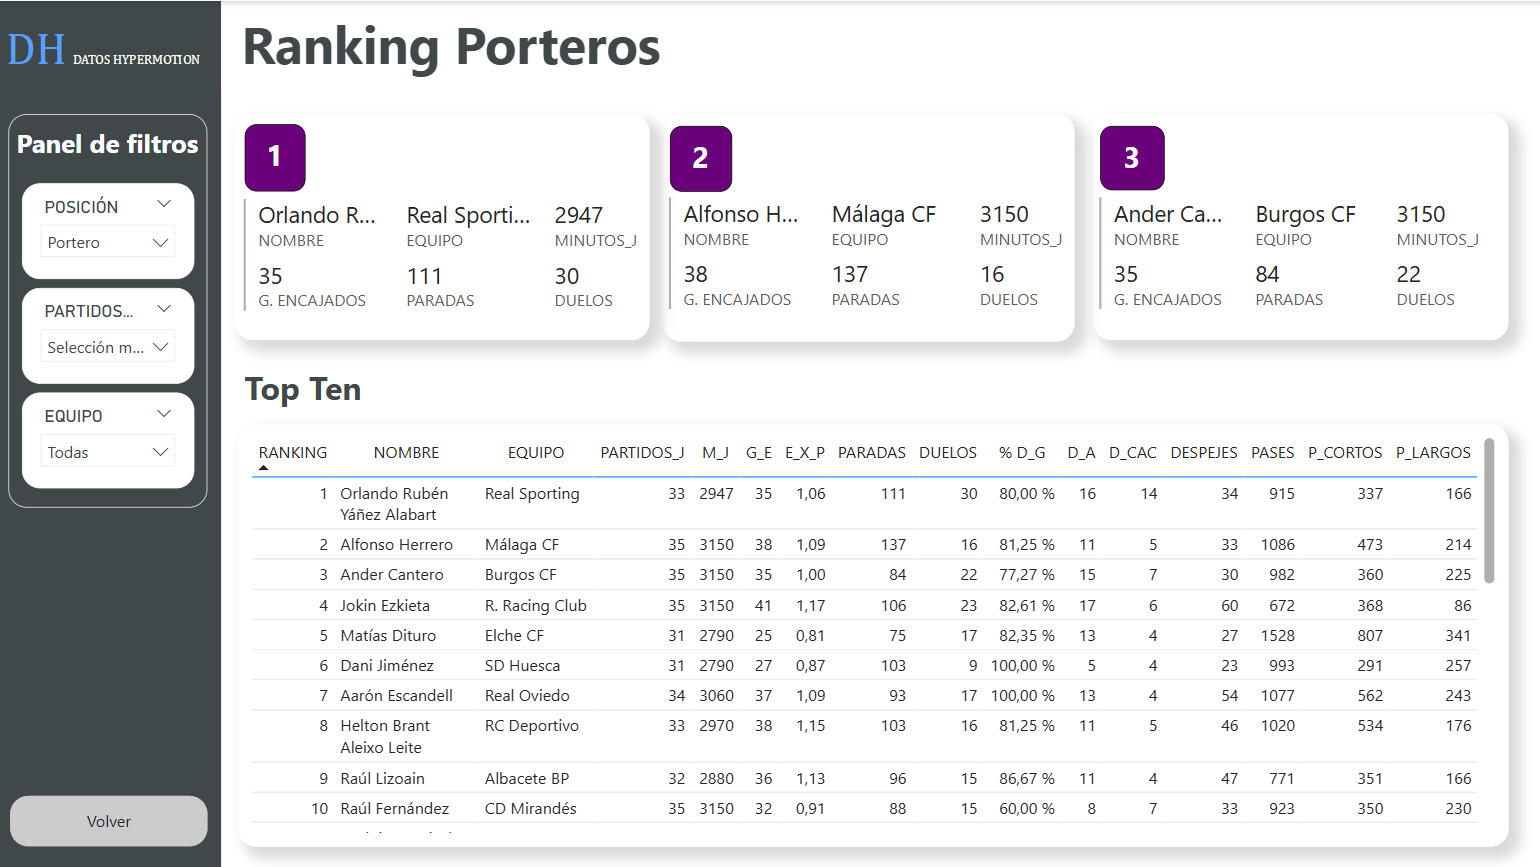

Con estos parámetros, nuestro número 1 del ránking no es el menos goleado, de esta forma podemos analizar todos los parámetros que deseemos para encontrar el jugador que mejor se adapta a nuestra búsqueda.

Otro ejemplo con los mejores mediocentros defensivos, donde los parámetros más valiosos en este caso son balones recuperados, % de pases buenos, % de duelos ganados


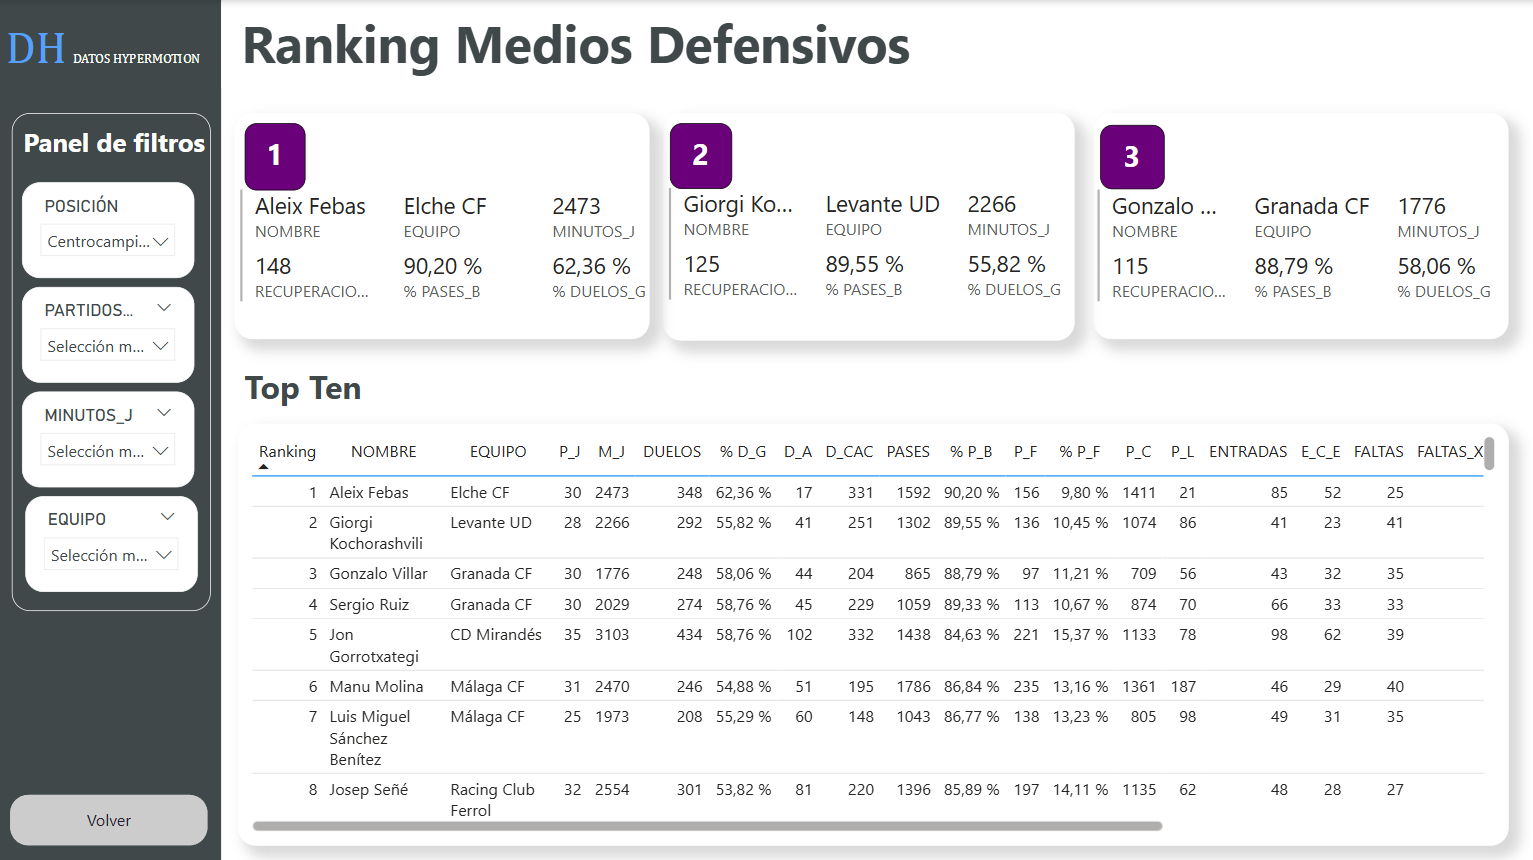

## Resumen


La parte más complicada pero esencial es poder encontrar datos de fuentes que sean verídicas y que podamos utilizar.
En sugundo lugar una buena limpieza y modelo de los datos para poder usarlos.
Finalmente explorar los datos y saber qué queremos encontrar en ellos y poder visualizar los resultado de una forma rápida y sencilla